In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sc.settings.verbosity = 3
warnings.filterwarnings("ignore")

reading Spatial_transcriptomics/filtered_feature_bc_matrix.h5
 (0:00:01)


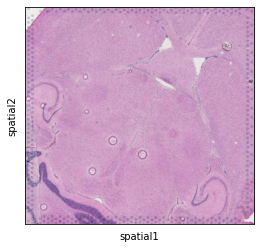

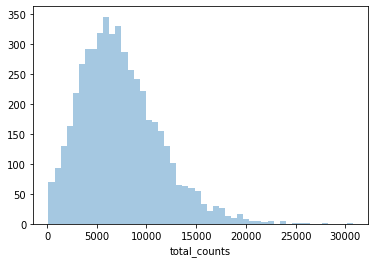

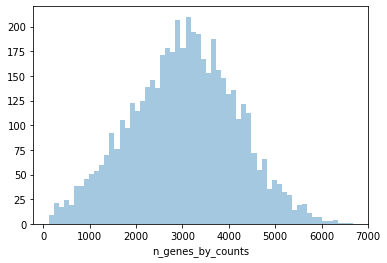

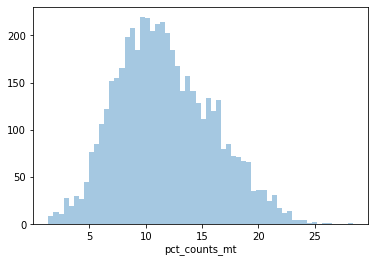

filtered out 9 cells that have less than 200 genes expressed
filtered out 13043 genes that are detected in less than 2 cells


In [2]:
data1 = sc.read_visium(path="./Spatial_transcriptomics/",)
sc.pl.spatial(data1)
data1.var_names_make_unique()

data1.var["SYMBOL"] = data1.var_names

data1.var["mt"] = data1.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(data1, qc_vars=["mt"], inplace=True)

sns.distplot(data1.obs["total_counts"], kde=False)
plt.show()
sns.distplot(data1.obs["n_genes_by_counts"], kde=False, bins=60)
plt.show()
sns.distplot(data1.obs["pct_counts_mt"], kde=False, bins=60)
plt.show()


sc.pp.filter_cells(data1, min_genes=200)
sc.pp.filter_genes(data1, min_cells=2)

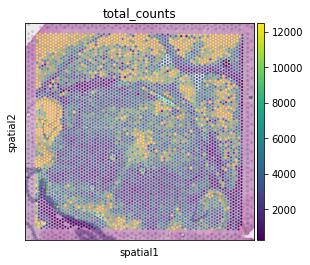

In [3]:
sc.pl.spatial(data1,color="total_counts",vmax="p90")

In [4]:
sc.pp.normalize_total(data1, inplace=True)
sc.pp.log1p(data1)
sc.pp.highly_variable_genes(data1, flavor="seurat", n_top_genes=2000)

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [5]:
sc.pp.pca(data1)
sc.pp.neighbors(data1)
sc.tl.umap(data1)
sc.tl.leiden(data1, key_added="clusters")

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:19)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:20)
running Leiden clustering
    finished: found 18 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


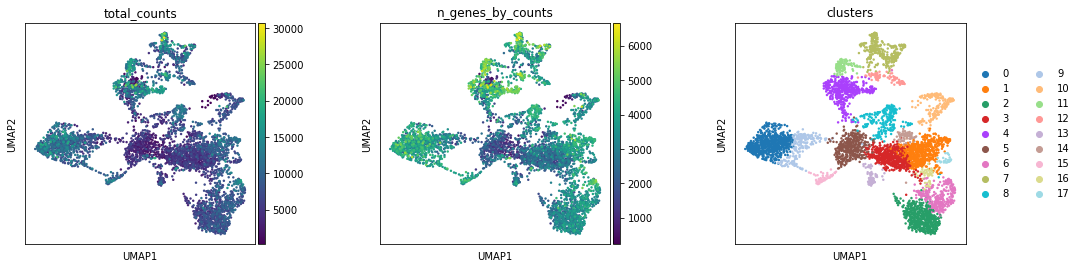

In [6]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(data1, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

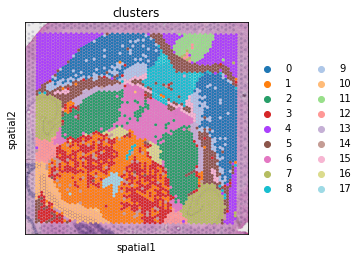

In [7]:
sc.pl.spatial(data1, img_key="hires", color="clusters", size=1.5)

In [8]:
sc.tl.rank_genes_groups(data1, "clusters", method="t-test")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_clusters']`
categories: 0, 1, 2, etc.
var_group_labels: 2, 6, 8


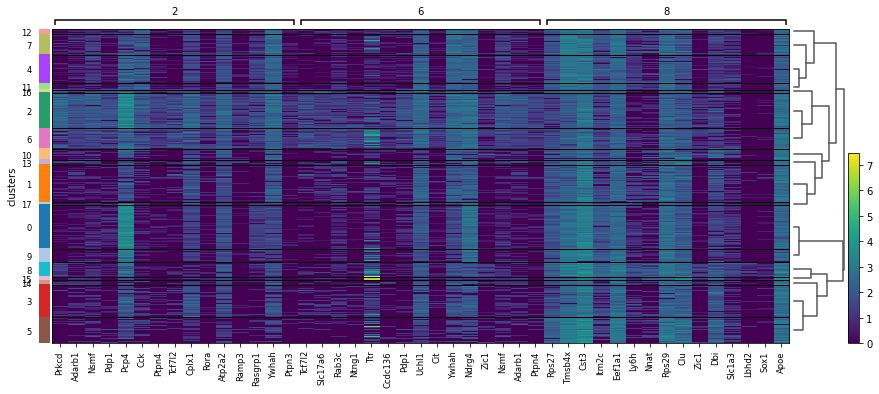

In [9]:
sc.pl.rank_genes_groups_heatmap(data1, groups=["2","6","8"], n_genes=15, groupby="clusters")

### 测试

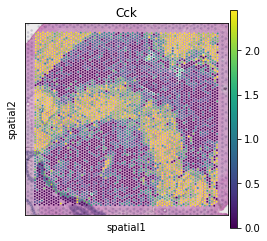

In [564]:
sc.pl.spatial(data1,color="Cck",vmax="p90")

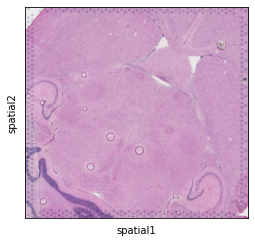

In [340]:
sc.pl.spatial(data1)

In [244]:
(data1.obsm["spatial"][:,0].max() - data1.obsm["spatial"][:,0].min())/(data1.obsm["spatial"][:,1].max() - data1.obsm["spatial"][:,1].min())

1.0544797013532432

In [257]:
low_sf = data1.uns["spatial"]["brain-3"]["scalefactors"]["tissue_lowres_scalef"]

In [459]:
row = data1.obsm["spatial"][:,0]*low_sf
col = data1.obsm["spatial"][:,1]*low_sf
row = 49*1.0545*((row-row.min())/(row.max()-row.min()))
col = 49*((col-col.min())/(col.max()-col.min()))

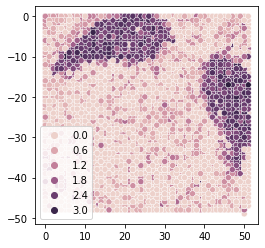

In [460]:
sns.scatterplot(x=row.astype("int64"), y=-col.astype("int64"), hue=np.squeeze(data1.X.todense()[:,data1.var_names == "Ppp1r1b"]).tolist()[0])
plt.show()

In [461]:
row = row.astype("int64")
col = col.astype("int64")

In [462]:
image = np.zeros([col.max()+1,row.max()+1])

In [569]:
col.max()+1

50

In [463]:
value = np.array(np.squeeze(data1.X.todense()[:,data1.var_names == "Ppp1r1b"]).tolist()[0])

In [464]:
tmp = pd.DataFrame([row,col,value]).T.groupby([0, 1])[2].mean().reset_index()

In [465]:
image[tmp[1].to_numpy().astype("int64"),tmp[0].to_numpy().astype("int64")] = tmp[2].to_numpy()

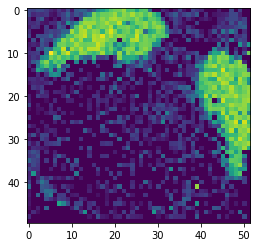

In [466]:
plt.imshow(image)

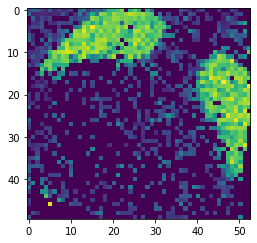

In [419]:
plt.imshow(image)

In [231]:
# image = np.zeros([127,77])
# image[data1.obs["array_col"]-1,data1.obs["array_row"]-1] = np.squeeze(data1.X.todense()[:,data1.var_names == "Ppp1r1b"])
# plt.imshow(image,origin ="lower")

### 输出全部表达图

In [467]:
low_sf = data1.uns["spatial"]["brain-3"]["scalefactors"]["tissue_lowres_scalef"]
row = data1.obsm["spatial"][:,0]*low_sf
col = data1.obsm["spatial"][:,1]*low_sf
row = 49*1.0545*((row-row.min())/(row.max()-row.min()))
col = 49*((col-col.min())/(col.max()-col.min()))

row = row.astype("int64")
col = col.astype("int64")

In [471]:
Exp_matrix = np.squeeze(data1.X.todense())

In [484]:
data1.var_names

Index(['Xkr4', 'Gm19938', 'Sox17', 'Mrpl15', 'Lypla1', 'Tcea1', 'Rgs20',
       'Atp6v1h', 'Oprk1', 'Npbwr1',
       ...
       'mt-Nd6', 'mt-Cytb', 'AC168977.1', 'CAAA01118383.1', 'Vamp7', 'Spry3',
       'Tmlhe', '4933409K07Rik', 'CAAA01147332.1', 'AC149090.1'],
      dtype='object', length=19242)

In [549]:
Spatial_Exp_matrix = pd.DataFrame(np.concatenate((row.reshape(-1, 1),col.reshape(-1, 1),Exp_matrix),axis=1))

In [550]:
Spatial_Exp_matrix.columns = Spatial_Exp_matrix.columns.astype("str")

In [551]:
Spatial_Exp_matrix.columns = ["COL","ROW"] + data1.var_names.tolist()

In [555]:
Spatial_Exp_matrix["ROW"] = Spatial_Exp_matrix["ROW"].astype("int64")
Spatial_Exp_matrix["COL"] = Spatial_Exp_matrix["COL"].astype("int64")

In [558]:
Spatial_Exp_matrix = Spatial_Exp_matrix.groupby(["COL", "ROW"]).mean().reset_index()

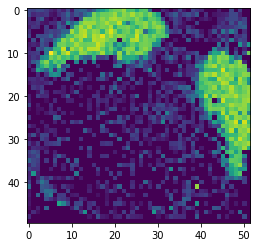

In [565]:
image = np.zeros([col.max()+1,row.max()+1])
image[Spatial_Exp_matrix["ROW"].to_numpy(),Spatial_Exp_matrix["COL"].to_numpy()] = Spatial_Exp_matrix["Ppp1r1b"].to_numpy()

plt.imshow(image)
plt.show()

In [567]:
Spatial_Exp_matrix.to_pickle("./Overlap/Spatial_Exp_matrix.pkl")